In [3]:
import torch
from transformers import AutoTokenizer, AutoModel

# from chatgpt
def get_sentence_embeddings(model_name_or_path, data_examples):
    

    # Set the device to use (GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Load pre-trained model tokenizer and model weights
    tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
    model = AutoModel.from_pretrained(model_name_or_path).to(device)

    # Tokenize the text samples and convert to tensors
    inputs = tokenizer(data_examples, padding=True, truncation=True, return_tensors="pt")
    inputs = inputs.to(device)

    # Pass the inputs through the model and retrieve the embeddings for all tokens
    outputs = model(**inputs)

    # Retrieve the attention mask from the inputs
    attention_mask = inputs["attention_mask"]

    # Compute the weighted mean of the token embeddings for each sentence
    sum_embeddings = torch.sum(outputs.last_hidden_state * attention_mask.unsqueeze(-1), dim=1)
    mean_embeddings = sum_embeddings / torch.sum(attention_mask, dim=1, keepdim=True)

    # Move embeddings back to the CPU and convert to numpy array
    mean_embeddings = mean_embeddings.cpu().detach().numpy()

    return mean_embeddings


In [24]:
# Example usage
model_name_or_path = "bert-base-uncased"
data_examples = [
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence.",
    "This is the first sentence.",
    "Here is the second sentence.",
    "And this is the third sentence."
]

# Compute sentence embeddings
embeddings = get_sentence_embeddings(model_name_or_path, data_examples)

# Print the resulting embeddings for each sentence
# for i, embedding in enumerate(embeddings):
#     # print(f"Sentence {i+1} embedding:\n{embedding}\n")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:


def get_sentence_embeddings_mine(model_name_or_path, data_examples):
    

    # Set the device to use (GPU if available)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Load pre-trained model tokenizer and model weights
    tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
    model = AutoModel.from_pretrained(model_name_or_path).to(device)

    # Tokenize the text samples and convert to tensors
    inputs = tokenizer(data_examples, padding=True, truncation=True, return_tensors="pt")
    inputs = inputs.to(device)

    with torch.no_grad():
    # Pass the inputs through the model and retrieve the embeddings for all tokens
        outputs = model(**inputs)

        attention_mask = inputs['attention_mask']
        sequence_output = outputs.last_hidden_state
        pooled_output  = torch.sum(
            sequence_output * attention_mask.unsqueeze(-1), dim=1
        ) / torch.clamp(torch.sum(attention_mask, dim=1, keepdims=True), min=1e-9)



    return pooled_output.cpu().numpy()

In [8]:
embeddings_mine = get_sentence_embeddings_mine(model_name_or_path, data_examples)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
import umap
import matplotlib.pyplot as plt


# def visualize_embeddings(embeddings):
#     # Use UMAP to reduce the dimensionality of the embeddings to 2D
#     reducer = umap.UMAP(n_components=2, metric = "cosine")
#     mapper = reducer.fit(embeddings)
#     umap_embeddings = mapper.embedding_ 

#     # Plot the resulting 2D embeddings
#     plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1])
#     plt.show()

#     return umap_embeddings

import umap
import matplotlib.pyplot as plt


def visualize_embeddings(embeddings):
    # Use UMAP to reduce the dimensionality of the embeddings to 2D
    reducer = umap.UMAP(n_components=2)
    umap_embeddings = reducer.fit_transform(embeddings)

    # Plot the resulting 2D embeddings
    plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1])
    plt.show()


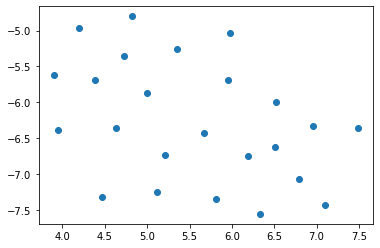

In [36]:
visualize_embeddings(embeddings)

In [32]:
umap_embeds.embedding_.shape

(24, 2)